In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("scholarship.csv")

In [3]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\aspha\AppData\Local\Temp\ipykernel_10064\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

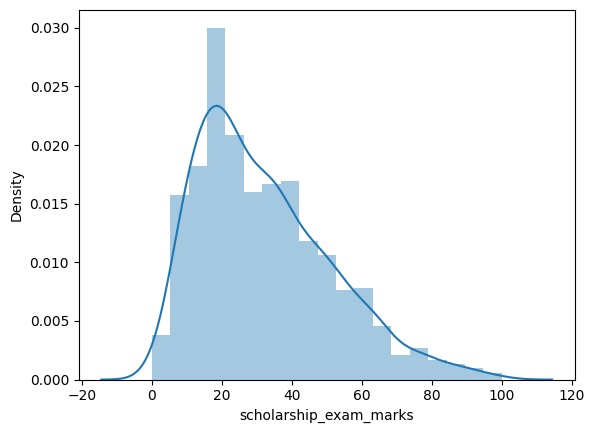

In [6]:
sns.distplot(data["scholarship_exam_marks"])

In [7]:
data["scholarship_exam_marks"].skew()

np.float64(0.8356419499466834)

In [8]:
data["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

<Axes: ylabel='scholarship_exam_marks'>

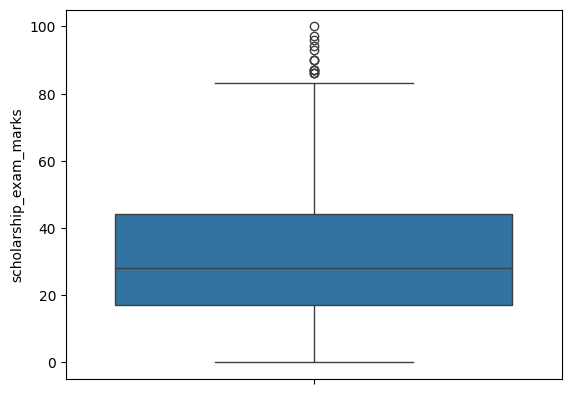

In [9]:
sns.boxplot(data["scholarship_exam_marks"])

In [10]:
percentile25 = data["scholarship_exam_marks"].quantile(0.25)
percentile75 = data["scholarship_exam_marks"].quantile(0.75)

In [12]:
IQR = percentile75 - percentile25


# IQR Calculation: The IQR measures the spread of the middle 50% of the data.
# Outlier Removal: The threshold values (min and max) are calculated as 1.5 times the IQR below the 25th percentile and above the 75th percentile, respectively. Any values outside this range are considered outliers.
# Removing Outliers: In df_new, all values outside the outlier threshold are removed, meaning only data that falls within the "typical" range (the central 50%) is kept.

In [14]:
min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR

In [17]:
#trimming
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

NameError: name 'df' is not defined

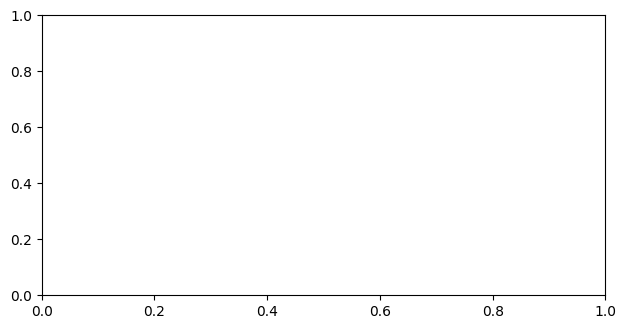

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(df["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(df_new["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(df_new["scholarship_exam_marks"])

plt.show()

In [19]:
#capping
new_data2 = data.copy()
new_data2["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max,
         max, 
         np.where(data["scholarship_exam_marks"]<min,min, data["scholarship_exam_marks"]))

In [22]:
new_data2.shape

(1000, 3)

In [23]:
new_data2["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: scholarship_exam_marks, dtype: float64